In [1]:
import pandas as pd

# Two different methods of conducting a t-test
import researchpy as rp
from scipy import stats


df = pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\Iris_Data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Showing descriptive statistics from pandas.describe()
df.groupby("species")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [3]:
rp.summary_cont(df.groupby("species")['sepal_width'])

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
Iris-setosa,50,3.418,0.381024,0.053885,3.311313,3.524687
Iris-versicolor,50,2.770,0.313798,0.044378,2.682136,2.857864
Iris-virginica,50,2.974,0.322497,0.045608,2.883701,3.064299


In [4]:
setosa = df[(df['species'] == 'Iris-setosa')]
setosa.reset_index(inplace= True)

versicolor = df[(df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

# Assumptions check :
# Homogeneity of variances

In [5]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

# Normal distribution of residuals

In [6]:
diff = setosa['sepal_width'] - versicolor['sepal_width']

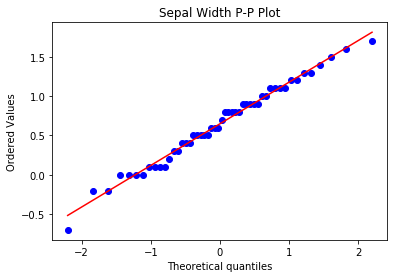

In [7]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot= plt)
plt.title('Sepal Width P-P Plot') 
plt.savefig('Sepal Width Residuals.png')

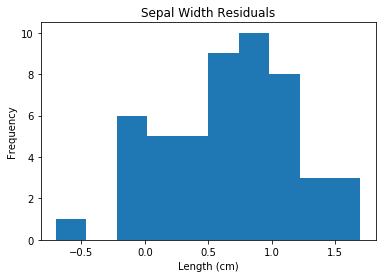

In [8]:
diff.plot(kind= "hist", title= "Sepal Width Residuals")
plt.xlabel("Length (cm)")
plt.savefig("Residuals Plot of Sepal Width.png")

In [9]:
diff.skew()

-0.17386802479248675

In [10]:
stats.shapiro(diff)


(0.9859335422515869, 0.8108891248703003)

# Independent t-test example

In [11]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [12]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,50.0,3.418,0.381024,0.053885,3.309714,3.526286
1,sepal_width,50.0,2.770,0.313798,0.044378,2.680820,2.859180
2,combined,100.0,3.094,0.476057,0.047606,2.999540,3.188460


In [13]:
results

,Independent t-test,results
0,Difference (sepal_width - sepal_width) =,0.6480
1,Degrees of freedom =,98.0000
2,t =,9.2828
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.8566
7,Hedge's g =,1.8423
8,Glass's delta =,1.7007
9,r =,0.6840


In [14]:
import numpy as np
np.corrcoef(setosa['sepal_width'], versicolor['sepal_width'])

array([[ 1.        , -0.10292428],
       [-0.10292428,  1.        ]])

In [15]:
import pandas as pd

df = pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


# Assumption Check: Outliers

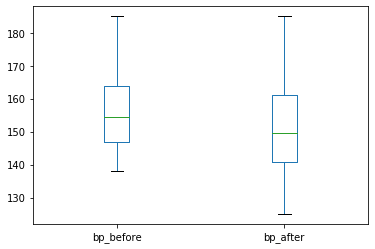

In [16]:
from scipy import stats
import matplotlib.pyplot as plt

df[['bp_before', 'bp_after']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')

# Assumption Check: Normal Distribution

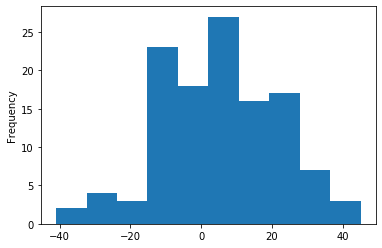

In [19]:
df['bp_difference'] = df['bp_before'] - df['bp_after']
df['bp_difference'].plot(kind="hist")
plt.savefig('blood pressure difference histogram.png')

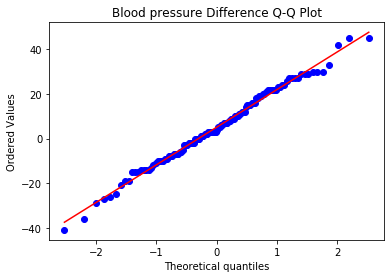

In [20]:
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('blood pressure difference qq plot.png')

In [21]:
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

In [23]:
# Paired Samples T-Test Example

In [22]:
stats.ttest_rel(df['bp_before'], df['bp_after'])


Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

# Welch’s t-test

In [23]:
import pandas as pd

df= pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\Iris_Data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.groupby("species")['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [25]:
setosa = df[(df['species'] == 'Iris-setosa')]
virginica = df[(df['species'] == 'Iris-virginica')]

In [26]:
from scipy import stats

stats.shapiro(setosa['petal_length'])

(0.9549458622932434, 0.05464918911457062)

In [27]:
stats.shapiro(virginica['petal_length'])

(0.9621862769126892, 0.10977369546890259)

In [29]:
stats.levene(setosa['petal_length'],virginica['petal_length'])

LeveneResult(statistic=39.97666700191087, pvalue=7.651500019079995e-09)

In [28]:
stats.ttest_ind(setosa['petal_length'], virginica['petal_length'], equal_var = False)

Ttest_indResult(statistic=-49.965703359355636, pvalue=9.713867061697096e-50)

# Welch T-test signed rank

In [30]:
import pandas as pd

df = pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\blood_pressure.csv")

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


In [31]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

In [32]:
df["bp_difference"]=df["bp_before"]-df["bp_after"]

In [33]:
df

,patient,sex,agegrp,bp_before,bp_after,bp_difference
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5
...,...,...,...,...,...,...
115,116,Female,60+,152,152,0
116,117,Female,60+,161,152,9
117,118,Female,60+,165,174,-9
118,119,Female,60+,149,151,-2


In [35]:
df[df["bp_difference"]==0]

,patient,sex,agegrp,bp_before,bp_after,bp_difference
41,42,Male,60+,158,158,0
74,75,Female,30-45,147,147,0
103,104,Female,60+,148,148,0
115,116,Female,60+,152,152,0


In [36]:
stats.wilcoxon(df["bp_difference"])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)